## DATA PRE-PROCESSING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_use = pd.read_csv('C:/Users/PRIYANSHU/MJ/flights.csv')
print(df_use.shape)

(5819079, 31)


In [3]:
df = df_use.sample(n=20000).copy()
del df_use

In [4]:
print(df.shape)
df.head()

(20000, 31)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4598004,2015,10,14,3,DL,1894,N354NW,14771,11193,1205,...,1921.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
491375,2015,2,2,1,WN,1320,N778SW,SFO,STL,1315,...,1852.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
484432,2015,2,2,1,US,1951,NaN,LGA,CLT,630,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
2543790,2015,6,10,3,NK,412,N622NK,MYR,LBE,1240,...,1410.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2973281,2015,7,6,1,DL,1539,N332NB,MSP,BDL,1010,...,1343.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
missing = df.isnull().sum()
missing

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER               56
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME           335
DEPARTURE_DELAY          335
TAXI_OUT                 345
WHEELS_OFF               345
SCHEDULED_TIME             0
ELAPSED_TIME             398
AIR_TIME                 398
DISTANCE                   0
WHEELS_ON                356
TAXI_IN                  356
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME             356
ARRIVAL_DELAY            398
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    19651
AIR_SYSTEM_DELAY       16365
SECURITY_DELAY         16365
AIRLINE_DELAY          16365
LATE_AIRCRAFT_DELAY    16365
WEATHER_DELAY          16365
dtype: int64

In [6]:
df.drop('CANCELLATION_REASON', axis='columns', inplace = True)

In [7]:
missing = df.isnull().sum()
missing

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER               56
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME           335
DEPARTURE_DELAY          335
TAXI_OUT                 345
WHEELS_OFF               345
SCHEDULED_TIME             0
ELAPSED_TIME             398
AIR_TIME                 398
DISTANCE                   0
WHEELS_ON                356
TAXI_IN                  356
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME             356
ARRIVAL_DELAY            398
DIVERTED                   0
CANCELLED                  0
AIR_SYSTEM_DELAY       16365
SECURITY_DELAY         16365
AIRLINE_DELAY          16365
LATE_AIRCRAFT_DELAY    16365
WEATHER_DELAY          16365
dtype: int64

In [8]:
df.drop(['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], axis= 1, inplace = True)

In [9]:
missing = df.isnull().sum()
missing

YEAR                     0
MONTH                    0
DAY                      0
DAY_OF_WEEK              0
AIRLINE                  0
FLIGHT_NUMBER            0
TAIL_NUMBER             56
ORIGIN_AIRPORT           0
DESTINATION_AIRPORT      0
SCHEDULED_DEPARTURE      0
DEPARTURE_TIME         335
DEPARTURE_DELAY        335
TAXI_OUT               345
WHEELS_OFF             345
SCHEDULED_TIME           0
ELAPSED_TIME           398
AIR_TIME               398
DISTANCE                 0
WHEELS_ON              356
TAXI_IN                356
SCHEDULED_ARRIVAL        0
ARRIVAL_TIME           356
ARRIVAL_DELAY          398
DIVERTED                 0
CANCELLED                0
dtype: int64

In [10]:
df['FLIGHT_NUMBER'].value_counts()

201     18
470     18
303     18
36      18
715     17
        ..
2278     1
6388     1
6404     1
6420     1
2049     1
Name: FLIGHT_NUMBER, Length: 5355, dtype: int64

In [11]:
df['DEPARTURE_TIME'].fillna(value=df['DEPARTURE_TIME'].mean(), inplace=True)

In [12]:
missing = df.isnull().sum()
missing

YEAR                     0
MONTH                    0
DAY                      0
DAY_OF_WEEK              0
AIRLINE                  0
FLIGHT_NUMBER            0
TAIL_NUMBER             56
ORIGIN_AIRPORT           0
DESTINATION_AIRPORT      0
SCHEDULED_DEPARTURE      0
DEPARTURE_TIME           0
DEPARTURE_DELAY        335
TAXI_OUT               345
WHEELS_OFF             345
SCHEDULED_TIME           0
ELAPSED_TIME           398
AIR_TIME               398
DISTANCE                 0
WHEELS_ON              356
TAXI_IN                356
SCHEDULED_ARRIVAL        0
ARRIVAL_TIME           356
ARRIVAL_DELAY          398
DIVERTED                 0
CANCELLED                0
dtype: int64

In [13]:
df['DEPARTURE_TIME']=df['DEPARTURE_TIME'].astype(int)

In [14]:
df['DEPARTURE_TIME']

4598004    1204
491375     1315
484432     1336
2543790    1236
2973281    1009
           ... 
4262931     845
4634520    1523
3306525    2329
4707888    1111
2453393      40
Name: DEPARTURE_TIME, Length: 20000, dtype: int32

In [15]:
df['DEPARTURE_DELAY'].fillna(value=df['DEPARTURE_DELAY'].mean(), inplace=True)
df['TAXI_OUT'].fillna(value=df['TAXI_OUT'].mean(), inplace=True)
df['WHEELS_OFF'].fillna(value=df['WHEELS_OFF'].mean(), inplace=True)
df['WHEELS_ON'].fillna(value=df['WHEELS_ON'].mean(), inplace=True)
df['ELAPSED_TIME'].fillna(value=df['ELAPSED_TIME'].mean(), inplace=True)
df['AIR_TIME'].fillna(value=df['AIR_TIME'].mean(), inplace=True)
df['TAXI_IN'].fillna(value=df['TAXI_IN'].mean(), inplace=True)
df['ARRIVAL_TIME'].fillna(value=df['ARRIVAL_TIME'].mean(), inplace=True)
df['ARRIVAL_DELAY'].fillna(value=df['ARRIVAL_DELAY'].mean(), inplace=True)

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
df['DEPARTURE_DELAY']=df['DEPARTURE_DELAY'].astype(int)
df['TAXI_OUT']=df['TAXI_OUT'].astype(int)
df['WHEELS_OFF']=df['WHEELS_OFF'].astype(int)
df['WHEELS_ON']=df['WHEELS_ON'].astype(int)
df['ELAPSED_TIME']=df['ELAPSED_TIME'].astype(int)
df['AIR_TIME']=df['AIR_TIME'].astype(int)
df['TAXI_IN']=df['TAXI_IN'].astype(int)
df['ARRIVAL_TIME']=df['ARRIVAL_TIME'].astype(int)
df['ARRIVAL_DELAY']=df['ARRIVAL_DELAY'].astype(int)

In [18]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
4598004,2015,10,14,3,DL,1894,N354NW,14771,11193,1205,...,257,232,2036,1917,4,1925,1921,-4,0,0
491375,2015,2,2,1,WN,1320,N778SW,SFO,STL,1315,...,217,200,1735,1849,3,1905,1852,-13,0,0
484432,2015,2,2,1,US,1951,NaN,LGA,CLT,630,...,137,113,544,1475,7,841,1480,4,0,1
2543790,2015,6,10,3,NK,412,N622NK,MYR,LBE,1240,...,94,69,456,1406,4,1408,1410,2,0,0
2973281,2015,7,6,1,DL,1539,N332NB,MSP,BDL,1010,...,154,136,1050,1337,6,1345,1343,-2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262931,2015,9,23,3,OO,4769,N429SW,SLC,TUS,845,...,108,86,601,928,5,941,933,-8,0,0
4634520,2015,10,16,5,EV,4892,N881AS,11433,10577,1526,...,76,54,378,1635,4,1646,1639,-7,0,0
3306525,2015,7,25,6,DL,1075,N603AT,ATL,HSV,2305,...,44,30,151,2308,5,2259,2313,14,0,0
4707888,2015,10,21,3,AA,1810,N578UW,10721,11057,1105,...,136,105,728,1316,11,1328,1327,-1,0,0


In [19]:
df = df.dropna()

In [20]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
4598004,2015,10,14,3,DL,1894,N354NW,14771,11193,1205,...,257,232,2036,1917,4,1925,1921,-4,0,0
491375,2015,2,2,1,WN,1320,N778SW,SFO,STL,1315,...,217,200,1735,1849,3,1905,1852,-13,0,0
2543790,2015,6,10,3,NK,412,N622NK,MYR,LBE,1240,...,94,69,456,1406,4,1408,1410,2,0,0
2973281,2015,7,6,1,DL,1539,N332NB,MSP,BDL,1010,...,154,136,1050,1337,6,1345,1343,-2,0,0
5255884,2015,11,25,3,AA,433,N162UW,PHX,SFO,1120,...,122,101,651,1213,6,1235,1219,-16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262931,2015,9,23,3,OO,4769,N429SW,SLC,TUS,845,...,108,86,601,928,5,941,933,-8,0,0
4634520,2015,10,16,5,EV,4892,N881AS,11433,10577,1526,...,76,54,378,1635,4,1646,1639,-7,0,0
3306525,2015,7,25,6,DL,1075,N603AT,ATL,HSV,2305,...,44,30,151,2308,5,2259,2313,14,0,0
4707888,2015,10,21,3,AA,1810,N578UW,10721,11057,1105,...,136,105,728,1316,11,1328,1327,-1,0,0


In [21]:
missing = df.isnull().sum()
missing

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [22]:
df.drop("DIVERTED", axis=1, inplace = True)


In [23]:
df.drop("CANCELLED",axis=1, inplace = True)

In [24]:
missing = df.isnull().sum()
missing

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
dtype: int64

In [25]:
df.shape

(19944, 23)

In [26]:
df['AIRLINE'] = pd.factorize(df.AIRLINE)[0] + 1
print (df['AIRLINE'])

4598004     1
491375      2
2543790     3
2973281     1
5255884     4
           ..
4262931    11
4634520     9
3306525     1
4707888     4
2453393     1
Name: AIRLINE, Length: 19944, dtype: int64


In [27]:
df['TAIL_NUMBER'] = pd.factorize(df.TAIL_NUMBER)[0] + 1

df['ORIGIN_AIRPORT'] = pd.factorize(df.ORIGIN_AIRPORT)[0] + 1

df['DESTINATION_AIRPORT'] = pd.factorize(df.DESTINATION_AIRPORT)[0] + 1


In [28]:
df['TAIL_NUMBER'].value_counts()

347     18
1234    16
896     16
1302    14
1467    14
        ..
3052     1
3168     1
3606     1
3590     1
3493     1
Name: TAIL_NUMBER, Length: 4260, dtype: int64

## DATA VISUALISATION

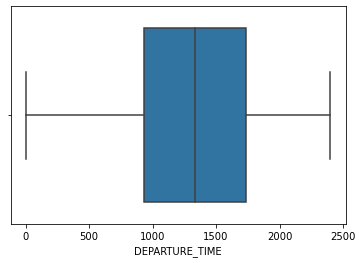

In [29]:
import seaborn as sns
sns.boxplot(x=df['DEPARTURE_TIME'])


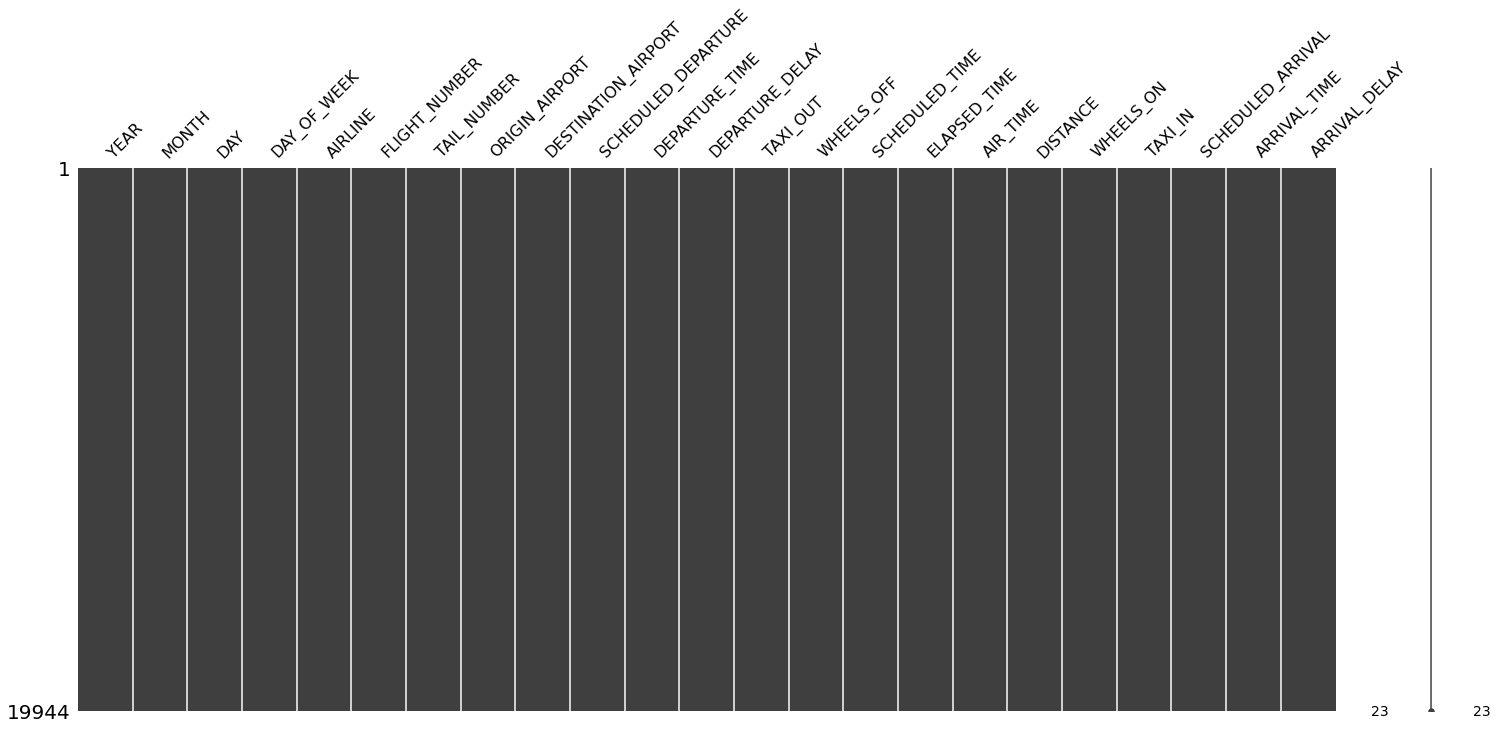

In [30]:
import missingno as msno
msno.matrix(df)

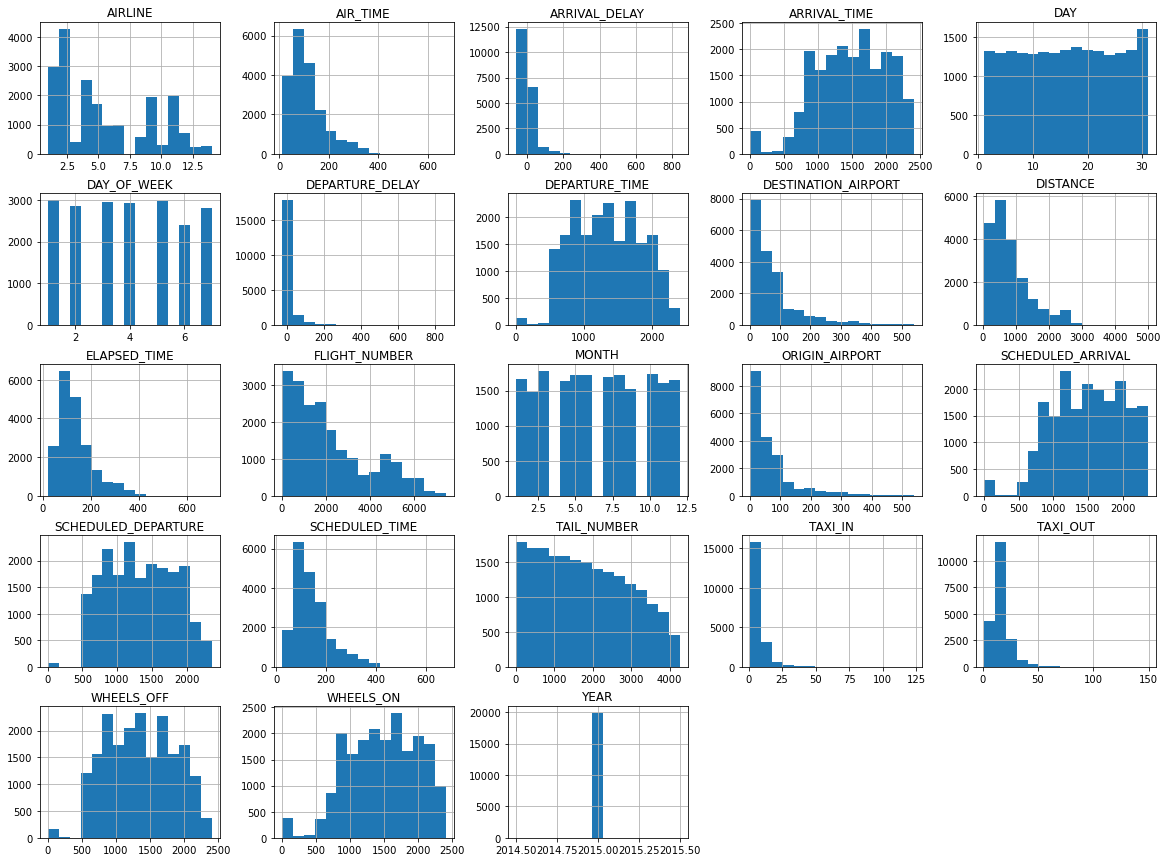

In [31]:
num_bins = 15

df.hist(bins=num_bins, figsize=(20,15))
plt.savefig("histogram_plots")
plt.show()

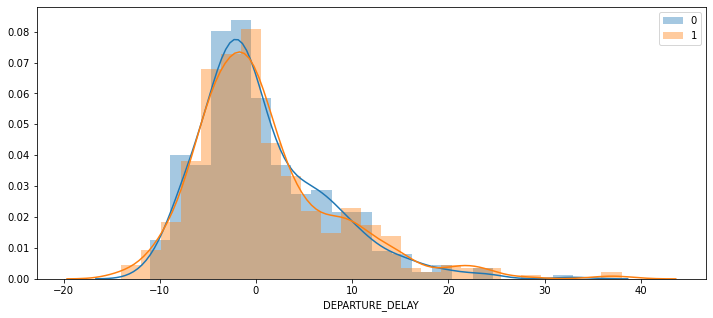

In [32]:
plt.figure(figsize=(12,5))
sns.distplot(df["DEPARTURE_DELAY"][df["ARRIVAL_DELAY"]==0])
sns.distplot(df["DEPARTURE_DELAY"][df["ARRIVAL_DELAY"]==1])
plt.legend(['0','1'])
plt.show()

## FEATURE SELECTION


In [33]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [34]:
array = df.values
X = array[:,0:23]
Y = array[:,22]

In [35]:
Y

array([ -4., -13.,   2., ...,  14.,  -1.,  -4.])

### FEATURE IMPORTANCE


In [36]:
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.         0.03917781 0.04175618 0.03813846 0.03403669 0.04112446
 0.0425788  0.03966477 0.03981283 0.03951414 0.03974009 0.04994759
 0.04342958 0.04036886 0.04117586 0.04208887 0.04130688 0.03972432
 0.04090363 0.04063565 0.04054992 0.04071356 0.14361105]


### Recursive Feature Elimination

In [37]:
model = LogisticRegression()
rfe = RFE(model, 16)
fit = rfe.fit(X, Y)

In [38]:
print("Num Features: ", fit.n_features_) 
print("Selected Features: ",fit.support_) 
print("Feature Ranking: ", fit.ranking_) 

Num Features:  16
Selected Features:  [ True False False False False  True  True  True  True  True  True  True
 False  True  True  True False  True  True False  True  True  True]
Feature Ranking:  [1 6 5 8 7 1 1 1 1 1 1 1 3 1 1 1 2 1 1 4 1 1 1]


In [39]:
df_selected = df[['YEAR','FLIGHT_NUMBER','TAIL_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY','WHEELS_OFF','ELAPSED_TIME','AIR_TIME','DISTANCE','WHEELS_ON','SCHEDULED_ARRIVAL','ARRIVAL_TIME','ARRIVAL_DELAY']].copy()

In [40]:
df_selected

,YEAR,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,WHEELS_OFF,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
4598004,2015,1894,1,1,1,1205,1204,-1,1225,257,232,2036,1917,1925,1921,-4
491375,2015,1320,2,2,2,1315,1315,0,1329,217,200,1735,1849,1905,1852,-13
2543790,2015,412,3,3,3,1240,1236,-4,1257,94,69,456,1406,1408,1410,2
2973281,2015,1539,4,4,4,1010,1009,-1,1021,154,136,1050,1337,1345,1343,-2
5255884,2015,433,5,5,5,1120,1117,-3,1132,122,101,651,1213,1235,1219,-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262931,2015,4769,699,99,58,845,845,0,902,108,86,601,928,941,933,-8
4634520,2015,4892,666,36,393,1526,1523,-3,1541,76,54,378,1635,1646,1639,-7
3306525,2015,1075,2588,46,161,2305,2329,24,2338,44,30,151,2308,2259,2313,14
4707888,2015,1810,2101,26,168,1105,1111,6,1131,136,105,728,1316,1328,1327,-1


### Classification Accuracy

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [42]:
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 

In [43]:
print("Accuracy: ",results.mean())

Accuracy:  0.037054270581167066


### Data Split

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [45]:
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print (X_train.shape)
print (X_test.shape)

(15955, 23)
(3989, 23)


In [46]:
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy:",result)

Accuracy: 0.03685134118826774


### Algoritm Dry Run

#### Naive Bayes

In [47]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [49]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy = %.2f%%" % (accuracy * 100.0))

Accuracy = 98.47%


In [50]:
print("F1 Score = ", f1_score(Y_test, y_pred, average="macro"))
print("Precision Score = ", precision_score(Y_test, y_pred, average="macro"))
print("Recall Score = ",recall_score(Y_test, y_pred, average="macro"))

F1 Score =  0.7143192918192919
Precision Score =  0.7074900793650793
Recall Score =  0.7340277777777777


#### KNN

In [51]:
from sklearn.neighbors import KNeighborsRegressor

In [52]:
model=KNeighborsRegressor()
model.fit(X,Y)
kfold = KFold(n_splits=10, random_state=10, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold)

In [53]:
print(results.mean())

0.3447789895565327


#### SVM

In [54]:
from sklearn.svm import SVC


In [55]:
model = SVC()              
model.fit(X_train, Y_train)

SVC()

In [56]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy = %.2f%%" % (accuracy * 100.0))

Accuracy = 4.04%


In [57]:
print("F1 Score = ", f1_score(Y_test, y_pred, average="macro"))
print("Precision Score = ", precision_score(Y_test, y_pred, average="macro"))
print("Recall Score = ",recall_score(Y_test, y_pred, average="macro"))

F1 Score =  0.0016877698518903642
Precision Score =  0.0018007621449517863
Recall Score =  0.005942116294063292


#### CART

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [59]:
Kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)


DecisionTreeClassifier()

In [60]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy = %.2f%%" % (accuracy * 100.0))

Accuracy = 98.87%


In [61]:
print("F1 Score = ", f1_score(Y_test, y_pred, average="macro"))
print("Precision Score = ", precision_score(Y_test, y_pred, average="macro"))
print("Recall Score = ",recall_score(Y_test, y_pred, average="macro"))

F1 Score =  0.7479674796747967
Precision Score =  0.7479674796747967
Recall Score =  0.7527100271002711


### DATA VIZUALISATION

In [62]:
from matplotlib import pyplot

In [63]:
plt.rcParams["figure.figsize"]=22,22

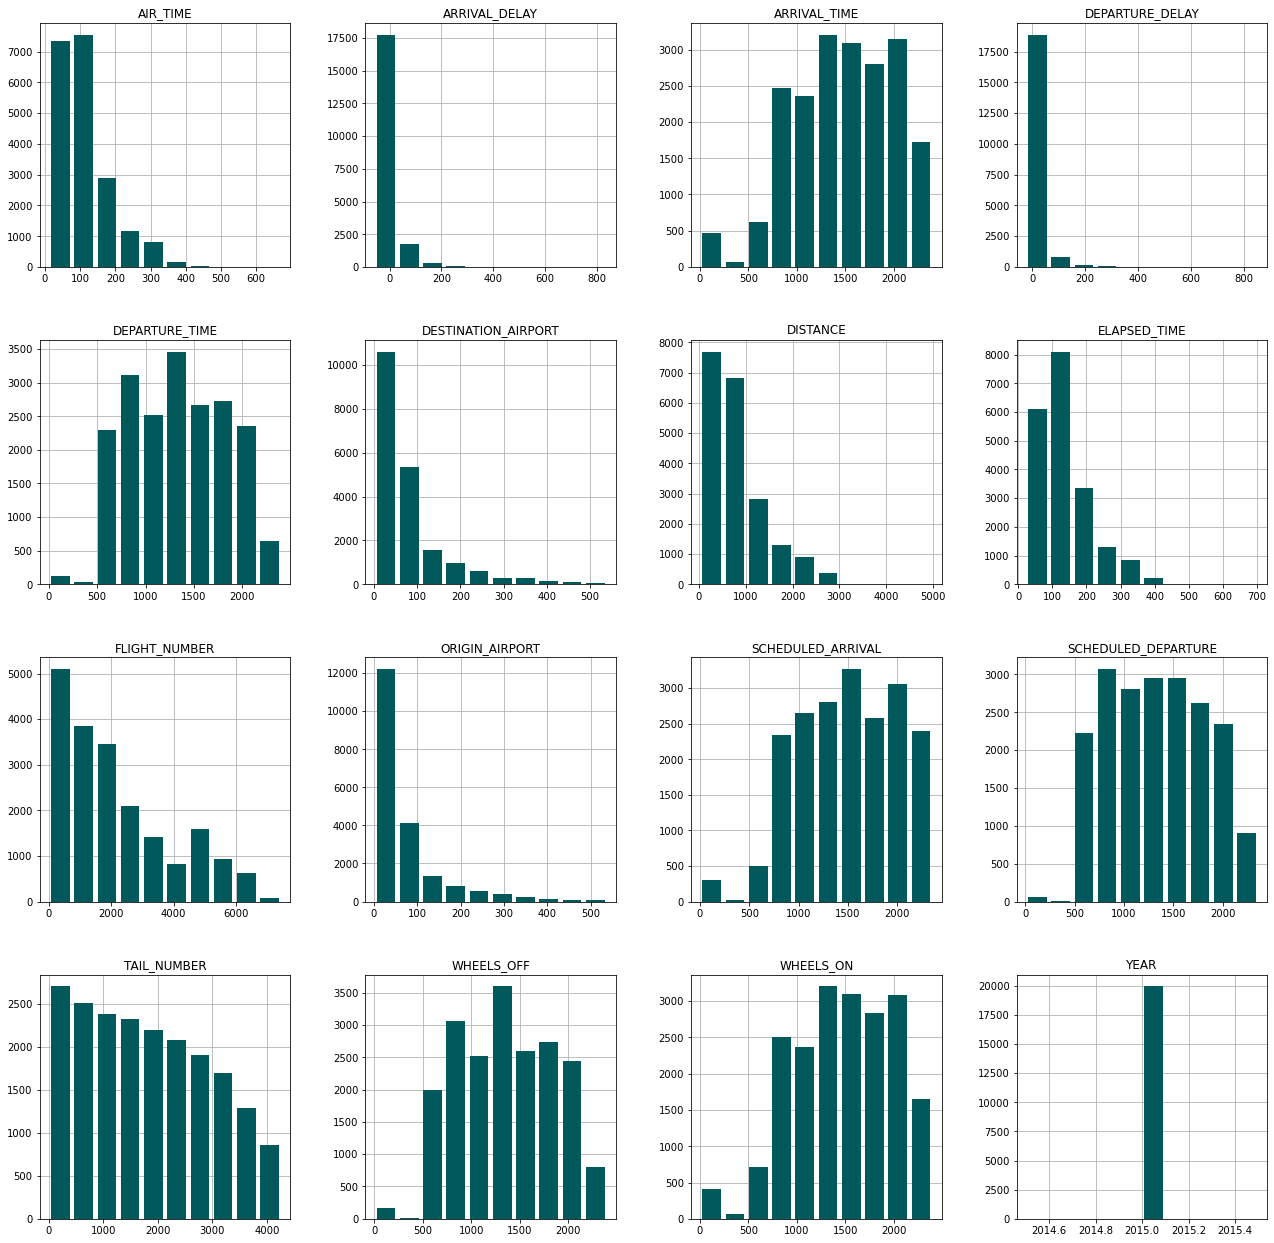

In [64]:
df_selected.hist(bins=10, color='#01595C', zorder=2, rwidth=0.8)
pyplot.show()

In [65]:
import seaborn as sns

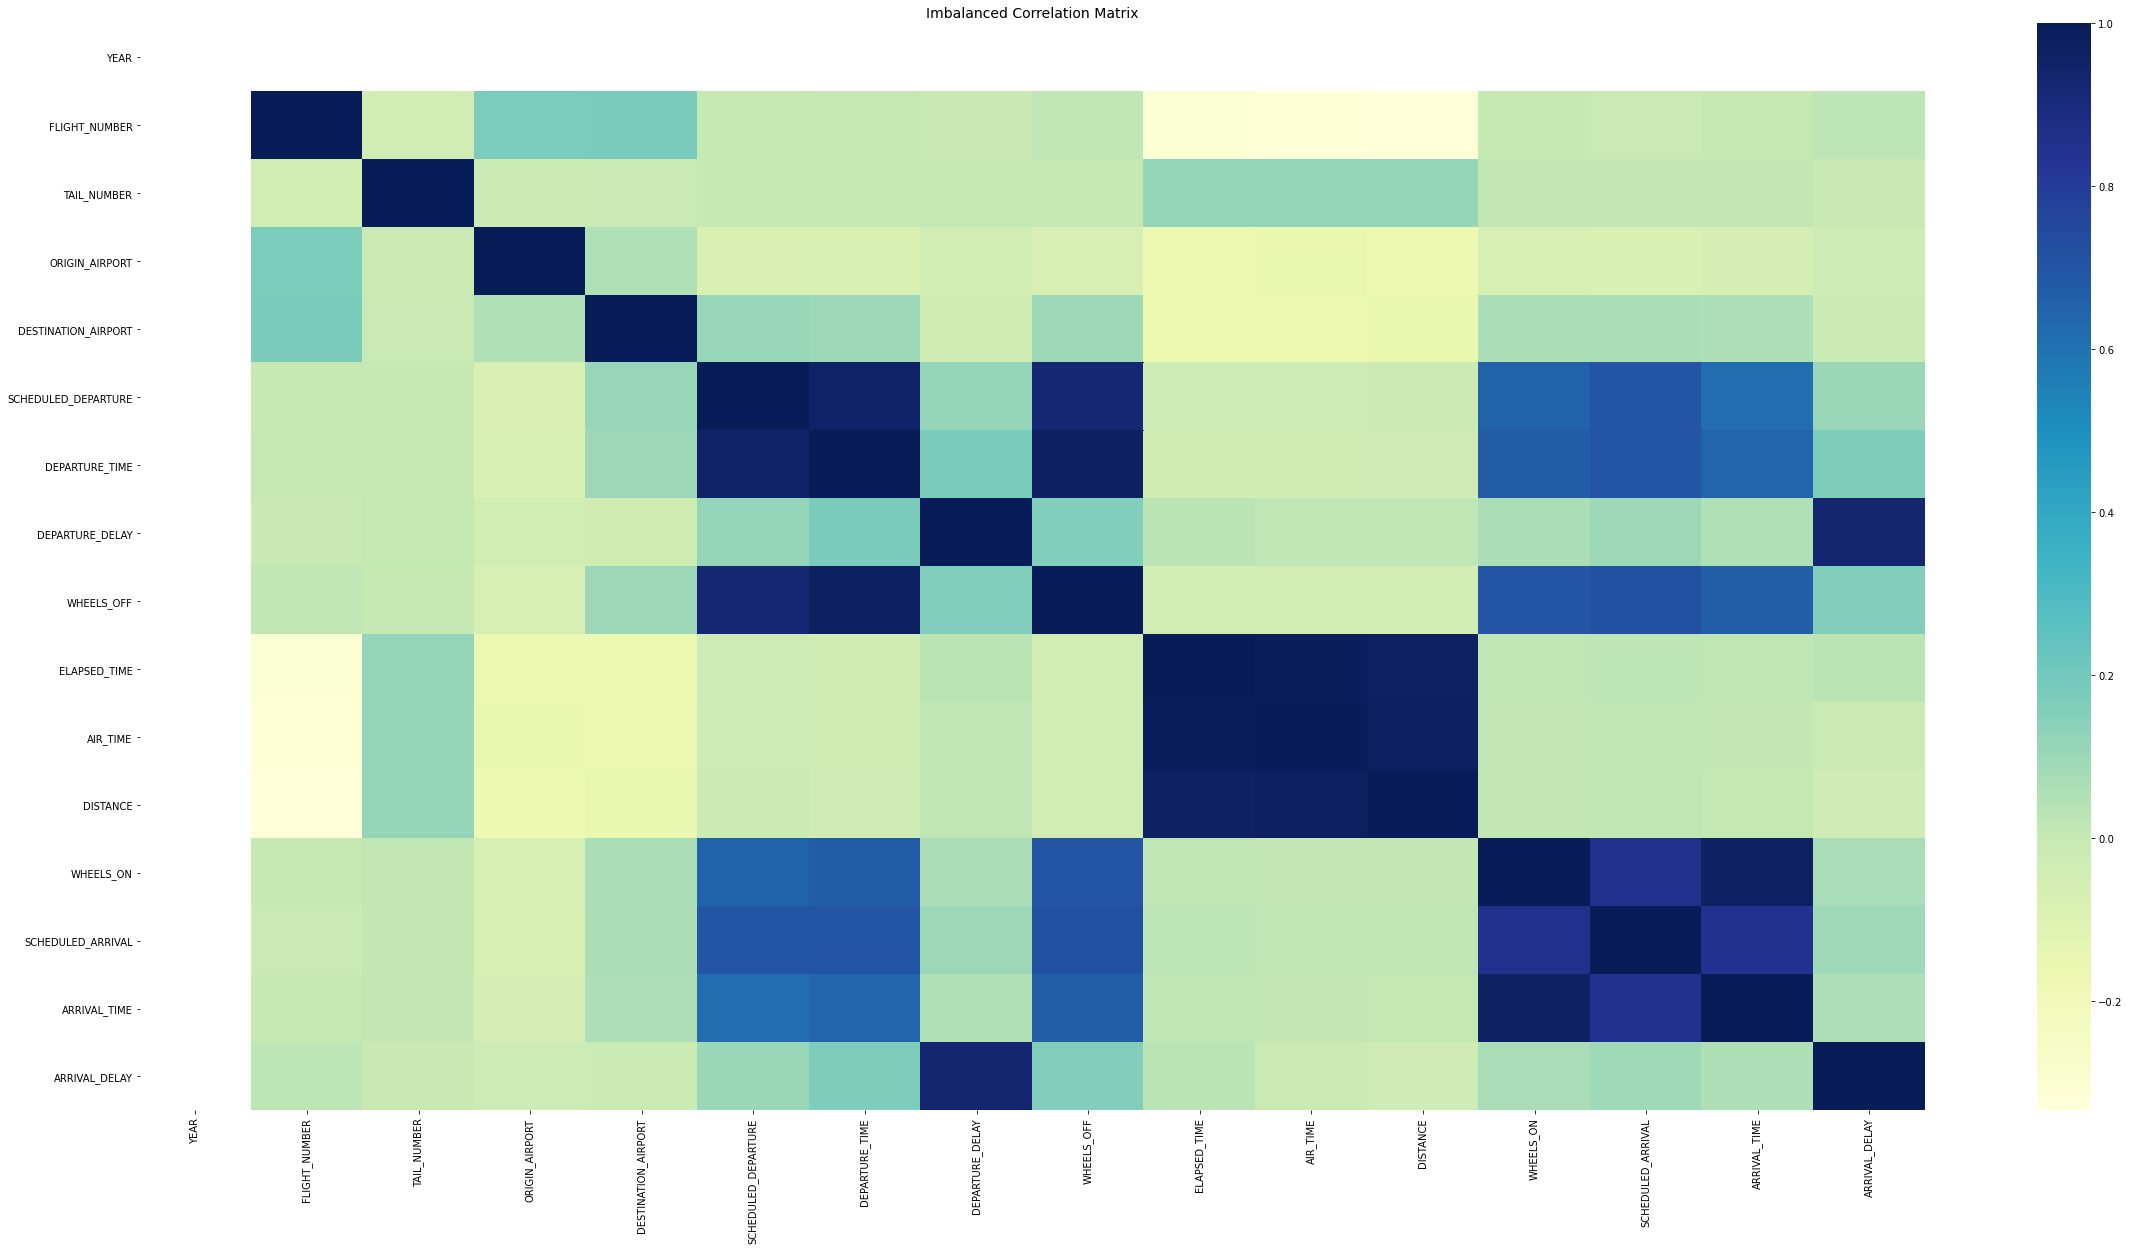

In [66]:
fig, ax = plt.subplots(figsize=(40,20))         
corr = df_selected.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

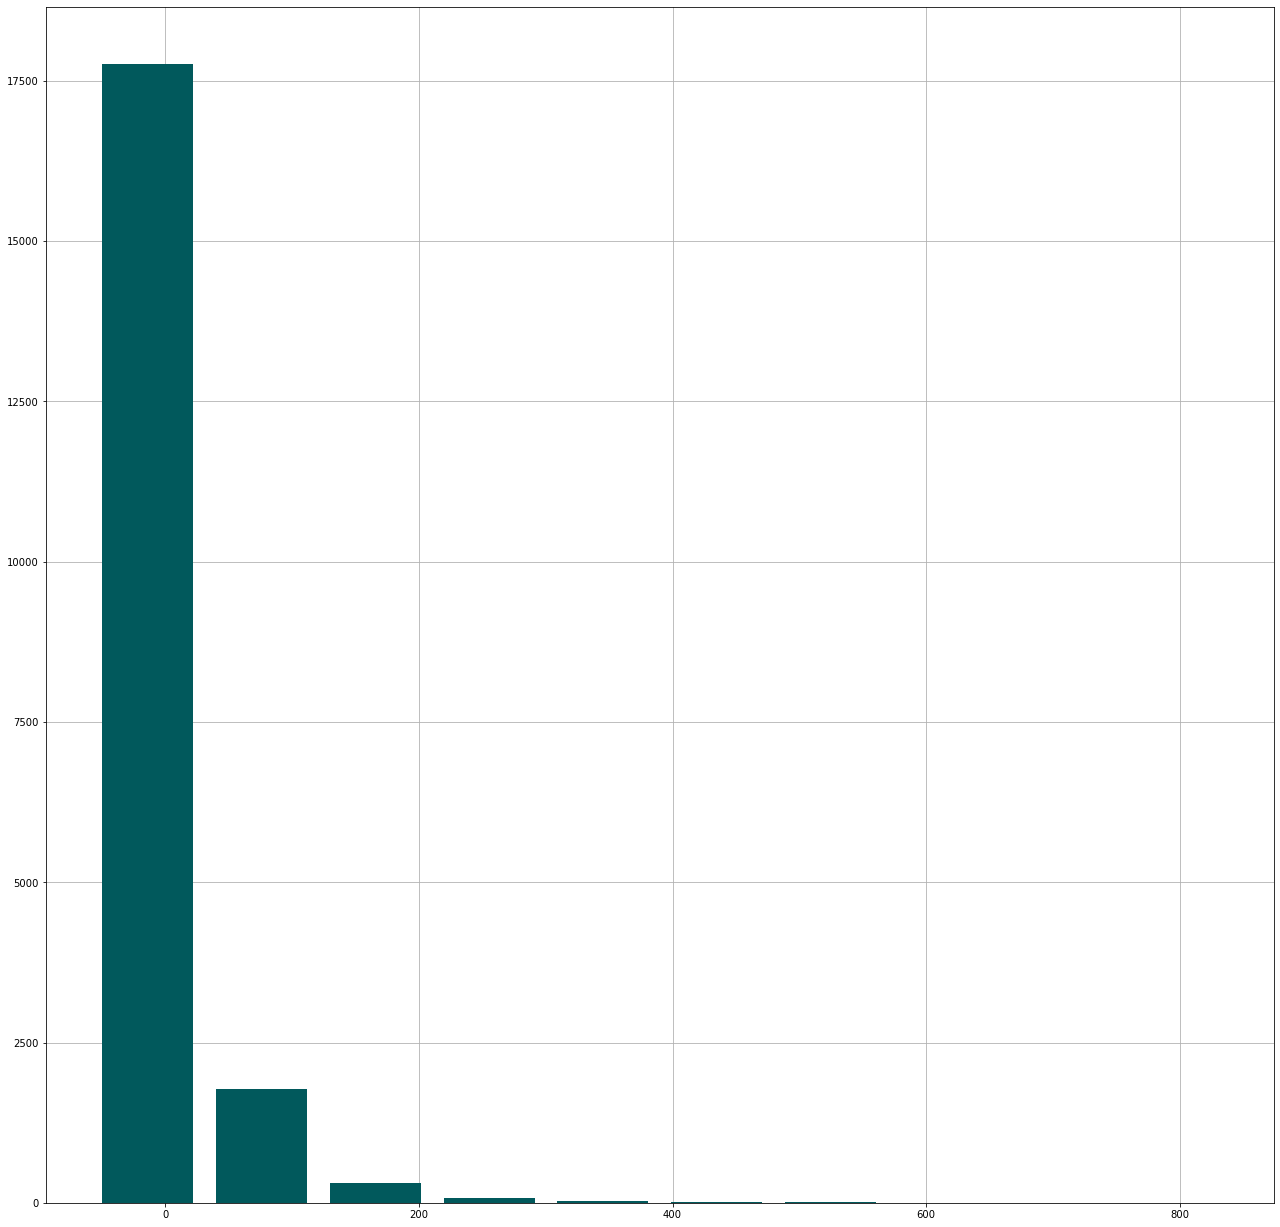

In [67]:
df_selected['ARRIVAL_DELAY'].hist(bins=10, color='#01595C', zorder=2, rwidth=0.8)
pyplot.show()

In [68]:
df_selected['ARRIVAL_DELAY'].value_counts()


 4      660
-8      625
-10     597
-9      574
-11     571
       ... 
 184      1
 280      1
 328      1
 664      1
 279      1
Name: ARRIVAL_DELAY, Length: 337, dtype: int64

### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
num_trees = 100
max_features = 16
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train, Y_train)


RandomForestClassifier(max_features=16)

In [71]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy = %.2f%%" % (accuracy * 100.0))

Accuracy = 97.02%


In [72]:
print("F1 Score = ", f1_score(Y_test, y_pred, average="macro"))
print("Precision Score = ", precision_score(Y_test, y_pred, average="macro"))
print("Recall Score = ",recall_score(Y_test, y_pred, average="macro"))

F1 Score =  0.6286360361725506
Precision Score =  0.6350419935599484
Recall Score =  0.6407021769418727


### RF CLASSIFIER

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rfc =  RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=7, min_samples_leaf=5)

In [74]:
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy = %.2f%%" % (accuracy * 100.0))

Accuracy = 65.86%


In [75]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [76]:
print("F1 Score = ", f1_score(Y_test, y_pred, average="macro"))
print("Precision Score = ", precision_score(Y_test, y_pred, average="macro"))
print("Recall Score = ",recall_score(Y_test, y_pred, average="macro"))

F1 Score =  0.15616078441240713
Precision Score =  0.1646651393032258
Recall Score =  0.16091781284771


### LGBM

In [77]:
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(random_state=7, n_estimators=100, colsample_bytree=0.5, 
                       max_depth=2, learning_rate=0.1, boosting_type='gbdt')
lgbmc.fit(X_train, Y_train)

LGBMClassifier(colsample_bytree=0.5, max_depth=2, random_state=7)

In [78]:
y_pred = lgbmc.predict(X_test)
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy = %.2f%%" % (accuracy * 100.0))

Accuracy = 2.43%


In [79]:
print("F1 Score = ", f1_score(Y_test, y_pred, average="macro"))
print("Precision Score = ", precision_score(Y_test, y_pred, average="macro"))
print("Recall Score = ",recall_score(Y_test, y_pred, average="macro"))

F1 Score =  0.0007350409337455966
Precision Score =  0.0011962738663246276
Recall Score =  0.008431915745111294


### BAGGED DECISION TREE

In [80]:
from sklearn.ensemble import BaggingClassifier

In [81]:
Seed = 10
kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100

In [82]:
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

In [83]:
model.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=7)

In [84]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy = %.2f%%" % (accuracy * 100.0))

Accuracy = 98.72%


In [85]:
print("F1 Score = ", f1_score(Y_test, y_pred, average="macro"))
print("Precision Score = ", precision_score(Y_test, y_pred, average="macro"))
print("Recall Score = ",recall_score(Y_test, y_pred, average="macro"))

F1 Score =  0.7203619047619048
Precision Score =  0.7176666666666667
Recall Score =  0.7273333333333333


### LINEAR RIGRESSION

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [88]:
y_pred = model.predict(X_test)
y_pred

array([ 59.,   7., -18., ...,  -9., -16., 143.])

In [89]:
from sklearn import metrics

In [90]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 1.2660791692259795e-13


### DECISION TREE

In [91]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [92]:
a = accuracy_score(Y_test, model.predict(X_test))
print("Accuracy = %.2f%%" % (a * 100.0))

Accuracy = 98.85%


In [93]:
y_pred = model.predict(X_test)

In [94]:
print("F1 Score = ", f1_score(Y_test, y_pred, average="macro"))
print("Precision Score = ", precision_score(Y_test, y_pred, average="macro"))
print("Recall Score = ",recall_score(Y_test, y_pred, average="macro"))

F1 Score =  0.7445344129554656
Precision Score =  0.7456140350877193
Recall Score =  0.7469635627530364


###  XGB Classifier

In [95]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [96]:
model = XGBClassifier()
model.fit(X_train, Y_train)

[19:15:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.52%


In [98]:
print("F1 Score = ", f1_score(Y_test, y_pred, average="macro"))
print("Precision Score = ", precision_score(Y_test, y_pred, average="macro"))
print("Recall Score = ",recall_score(Y_test, y_pred, average="macro"))

F1 Score =  0.6978782642089094
Precision Score =  0.6929435483870967
Recall Score =  0.7096774193548387
